In [2]:
import pandas as pd
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
# read in data
training = pd.read_csv("training.csv")

In [4]:
training.shape

(7049, 31)

In [5]:
training.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [6]:
training.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [7]:
# split out image values
image = []
for i in range(training.shape[0]):
    img = training['Image'][i].split(' ')
    img = ['0' if j == '' else j for j in img]
    image.append(img)

In [8]:
# create training set
X_train = np.array(image, dtype = 'float')
X_train.shape

(7049, 9216)

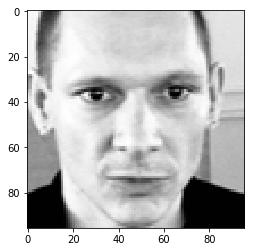

In [9]:
# show image
plt.imshow(X_train[666].reshape(96,96),cmap='gray')
plt.show()

In [10]:
# create training labels
labels = training.drop('Image', axis=1)
y_train = np.array(labels, dtype = 'float')

In [11]:
y_train.shape

(7049, 30)

In [12]:
# remove missing labels for now
X_train_nm = X_train[~np.isnan(y_train).any(axis=1)]
y_train_nm = y_train[~np.isnan(y_train).any(axis=1)]

In [13]:
X_train_nm.shape

(2140, 9216)

In [14]:
y_train_nm.shape

(2140, 30)

In [15]:
# adjust dimension for CNN later
X_train_nm2 = X_train_nm.reshape(-1,96,96,1)
X_train_nm2.shape

(2140, 96, 96, 1)

## Single Layer Fully Connected Network with 150 Epochs

In [36]:
# create model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(9216,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history = model.fit(X_train_nm, y_train_nm, epochs=150, shuffle=True, batch_size=5, validation_split=0.2, verbose=2)


Train on 1712 samples, validate on 428 samples
Epoch 1/150
 - 7s - loss: 28.8374 - rmse: 28.8374 - mean_absolute_error: 23.0228 - mean_absolute_percentage_error: 53.6246 - val_loss: 19.6627 - val_rmse: 19.6627 - val_mean_absolute_error: 15.0272 - val_mean_absolute_percentage_error: 31.9901
Epoch 2/150
 - 6s - loss: 12.6191 - rmse: 12.6191 - mean_absolute_error: 9.9341 - mean_absolute_percentage_error: 22.1734 - val_loss: 13.4160 - val_rmse: 13.4160 - val_mean_absolute_error: 10.7898 - val_mean_absolute_percentage_error: 23.7261
Epoch 3/150
 - 6s - loss: 10.9682 - rmse: 10.9682 - mean_absolute_error: 8.5931 - mean_absolute_percentage_error: 18.9905 - val_loss: 12.6773 - val_rmse: 12.6773 - val_mean_absolute_error: 10.0007 - val_mean_absolute_percentage_error: 21.4692
Epoch 4/150
 - 6s - loss: 10.1189 - rmse: 10.1189 - mean_absolute_error: 8.0135 - mean_absolute_percentage_error: 17.6115 - val_loss: 12.7094 - val_rmse: 12.7094 - val_mean_absolute_error: 10.0158 - val_mean_absolute_percen

Epoch 35/150
 - 6s - loss: 6.4048 - rmse: 6.4048 - mean_absolute_error: 4.9443 - mean_absolute_percentage_error: 10.9013 - val_loss: 12.2106 - val_rmse: 12.2106 - val_mean_absolute_error: 9.5396 - val_mean_absolute_percentage_error: 20.2264
Epoch 36/150
 - 6s - loss: 6.5887 - rmse: 6.5887 - mean_absolute_error: 5.0814 - mean_absolute_percentage_error: 11.1434 - val_loss: 12.0665 - val_rmse: 12.0665 - val_mean_absolute_error: 9.4287 - val_mean_absolute_percentage_error: 19.9811
Epoch 37/150
 - 6s - loss: 6.6922 - rmse: 6.6922 - mean_absolute_error: 5.2275 - mean_absolute_percentage_error: 11.4684 - val_loss: 12.8082 - val_rmse: 12.8082 - val_mean_absolute_error: 10.0541 - val_mean_absolute_percentage_error: 21.1220
Epoch 38/150
 - 6s - loss: 6.3921 - rmse: 6.3921 - mean_absolute_error: 4.9517 - mean_absolute_percentage_error: 10.8861 - val_loss: 11.8807 - val_rmse: 11.8807 - val_mean_absolute_error: 9.2736 - val_mean_absolute_percentage_error: 19.6725
Epoch 39/150
 - 6s - loss: 6.2140 -

 - 6s - loss: 5.7321 - rmse: 5.7321 - mean_absolute_error: 4.4569 - mean_absolute_percentage_error: 9.8610 - val_loss: 11.4517 - val_rmse: 11.4517 - val_mean_absolute_error: 8.9581 - val_mean_absolute_percentage_error: 19.0338
Epoch 70/150
 - 6s - loss: 5.4021 - rmse: 5.4021 - mean_absolute_error: 4.1672 - mean_absolute_percentage_error: 9.2635 - val_loss: 11.3654 - val_rmse: 11.3654 - val_mean_absolute_error: 8.8573 - val_mean_absolute_percentage_error: 18.6983
Epoch 71/150
 - 6s - loss: 5.4457 - rmse: 5.4457 - mean_absolute_error: 4.2122 - mean_absolute_percentage_error: 9.3729 - val_loss: 11.7448 - val_rmse: 11.7448 - val_mean_absolute_error: 9.1997 - val_mean_absolute_percentage_error: 19.8359
Epoch 72/150
 - 6s - loss: 5.3228 - rmse: 5.3228 - mean_absolute_error: 4.0986 - mean_absolute_percentage_error: 9.1430 - val_loss: 11.2485 - val_rmse: 11.2485 - val_mean_absolute_error: 8.7687 - val_mean_absolute_percentage_error: 18.6741
Epoch 73/150
 - 6s - loss: 5.3675 - rmse: 5.3675 - me

Epoch 104/150
 - 6s - loss: 4.7487 - rmse: 4.7487 - mean_absolute_error: 3.6584 - mean_absolute_percentage_error: 8.2392 - val_loss: 11.1874 - val_rmse: 11.1874 - val_mean_absolute_error: 8.7265 - val_mean_absolute_percentage_error: 18.3809
Epoch 105/150
 - 6s - loss: 4.7353 - rmse: 4.7353 - mean_absolute_error: 3.6540 - mean_absolute_percentage_error: 8.2452 - val_loss: 11.5868 - val_rmse: 11.5868 - val_mean_absolute_error: 8.9605 - val_mean_absolute_percentage_error: 19.1045
Epoch 106/150
 - 6s - loss: 4.8867 - rmse: 4.8867 - mean_absolute_error: 3.7782 - mean_absolute_percentage_error: 8.4660 - val_loss: 11.4909 - val_rmse: 11.4909 - val_mean_absolute_error: 8.9424 - val_mean_absolute_percentage_error: 18.7704
Epoch 107/150
 - 6s - loss: 4.7408 - rmse: 4.7408 - mean_absolute_error: 3.6487 - mean_absolute_percentage_error: 8.2340 - val_loss: 11.9039 - val_rmse: 11.9039 - val_mean_absolute_error: 9.3150 - val_mean_absolute_percentage_error: 19.4338
Epoch 108/150
 - 6s - loss: 4.7947 -

Epoch 138/150
 - 6s - loss: 4.6379 - rmse: 4.6379 - mean_absolute_error: 3.5963 - mean_absolute_percentage_error: 8.1120 - val_loss: 11.0607 - val_rmse: 11.0607 - val_mean_absolute_error: 8.5486 - val_mean_absolute_percentage_error: 18.1287
Epoch 139/150
 - 6s - loss: 4.4272 - rmse: 4.4272 - mean_absolute_error: 3.4114 - mean_absolute_percentage_error: 7.7546 - val_loss: 10.6968 - val_rmse: 10.6968 - val_mean_absolute_error: 8.2939 - val_mean_absolute_percentage_error: 17.7757
Epoch 140/150
 - 6s - loss: 4.3118 - rmse: 4.3118 - mean_absolute_error: 3.3404 - mean_absolute_percentage_error: 7.6105 - val_loss: 10.6421 - val_rmse: 10.6421 - val_mean_absolute_error: 8.2509 - val_mean_absolute_percentage_error: 17.4800
Epoch 141/150
 - 6s - loss: 4.4882 - rmse: 4.4882 - mean_absolute_error: 3.4886 - mean_absolute_percentage_error: 7.8964 - val_loss: 10.9640 - val_rmse: 10.9640 - val_mean_absolute_error: 8.4932 - val_mean_absolute_percentage_error: 17.8160
Epoch 142/150
 - 7s - loss: 4.2888 -

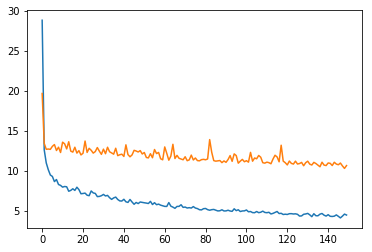

In [37]:
# plot metrics - RMSE
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.show()

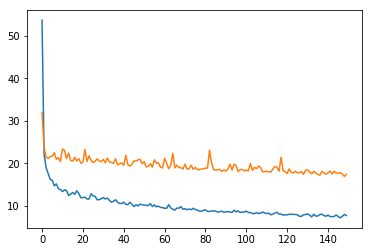

In [42]:
# plot metrics - MAPE
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.show()

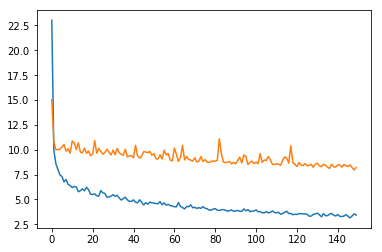

In [43]:
# plot metrics - MAE
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.show()

In [41]:
history.history.keys()

dict_keys(['val_loss', 'val_rmse', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'loss', 'rmse', 'mean_absolute_error', 'mean_absolute_percentage_error'])

In [52]:
# look at final RMSE value after 150 epochs
print(history.history.get('val_rmse')[-1])
print(history.history.get('rmse')[-1])

10.637481500055188
4.4448961699120355


## Single Layer Fully Connected Network with 10 Epochs

In [14]:
# create model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(9216,)))
#model.add(Dense(64, activation='relu'))
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_fc = model.fit(X_train_nm, y_train_nm, epochs=10, shuffle=True, batch_size=5, validation_split=0.2, verbose=2)


Train on 1712 samples, validate on 428 samples
Epoch 1/10
 - 8s - loss: 57.9135 - rmse: 57.9135 - mean_absolute_error: 52.5842 - mean_absolute_percentage_error: 113.3730 - val_loss: 51.4038 - val_rmse: 51.4038 - val_mean_absolute_error: 47.7248 - val_mean_absolute_percentage_error: 99.2461
Epoch 2/10
 - 6s - loss: 50.5846 - rmse: 50.5846 - mean_absolute_error: 46.9891 - mean_absolute_percentage_error: 98.8113 - val_loss: 51.0862 - val_rmse: 51.0862 - val_mean_absolute_error: 47.3851 - val_mean_absolute_percentage_error: 98.4062
Epoch 3/10
 - 6s - loss: 50.2672 - rmse: 50.2672 - mean_absolute_error: 46.6487 - mean_absolute_percentage_error: 97.9646 - val_loss: 50.7689 - val_rmse: 50.7689 - val_mean_absolute_error: 47.0444 - val_mean_absolute_percentage_error: 97.5612
Epoch 4/10
 - 6s - loss: 49.9497 - rmse: 49.9497 - mean_absolute_error: 46.3079 - mean_absolute_percentage_error: 97.1150 - val_loss: 50.4519 - val_rmse: 50.4519 - val_mean_absolute_error: 46.7035 - val_mean_absolute_percen

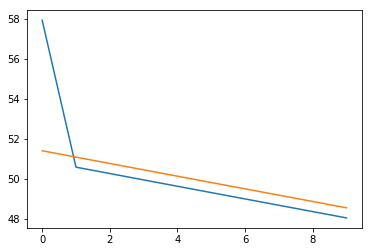

In [15]:
# plot metrics
plt.plot(history_fc.history['rmse'])
plt.plot(history_fc.history['val_rmse'])
plt.show()

In [16]:
# look at final RMSE value after 10 epochs
print(history_fc.history.get('val_rmse')[-1])
print(history_fc.history.get('rmse')[-1])

48.55798112566226
48.05285310076776


## Single Layer CNN with 16 Filters and 10 Epochs

In [31]:
# Single Layer CNN

# create model
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_cnn = model.fit(X_train_nm2, y_train_nm, epochs=10, shuffle=True, batch_size=5, validation_split=0.2, verbose=2)


Train on 1712 samples, validate on 428 samples
Epoch 1/10
 - 21s - loss: 47.2292 - rmse: 47.2292 - mean_absolute_error: 41.0988 - mean_absolute_percentage_error: 97.9824 - val_loss: 14.7852 - val_rmse: 14.7852 - val_mean_absolute_error: 11.5210 - val_mean_absolute_percentage_error: 24.9227
Epoch 2/10
 - 21s - loss: 9.9125 - rmse: 9.9125 - mean_absolute_error: 7.8571 - mean_absolute_percentage_error: 17.4658 - val_loss: 18.4037 - val_rmse: 18.4037 - val_mean_absolute_error: 14.2319 - val_mean_absolute_percentage_error: 30.8400
Epoch 3/10
 - 23s - loss: 9.2514 - rmse: 9.2514 - mean_absolute_error: 7.2958 - mean_absolute_percentage_error: 16.6391 - val_loss: 15.8055 - val_rmse: 15.8055 - val_mean_absolute_error: 12.3221 - val_mean_absolute_percentage_error: 26.6035
Epoch 4/10
 - 22s - loss: 9.1292 - rmse: 9.1292 - mean_absolute_error: 7.2506 - mean_absolute_percentage_error: 16.7739 - val_loss: 17.6622 - val_rmse: 17.6622 - val_mean_absolute_error: 14.1506 - val_mean_absolute_percentage_e

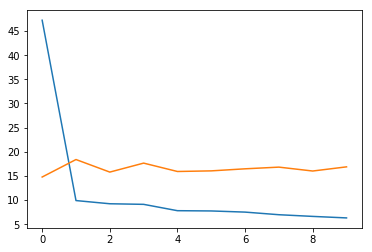

In [32]:
# plot metrics
plt.plot(history_cnn.history['rmse'])
plt.plot(history_cnn.history['val_rmse'])
plt.show()

In [33]:
# look at final RMSE value after 10 epochs
print(history_cnn.history.get('val_rmse')[-1])
print(history_cnn.history.get('rmse')[-1])

16.887982860903875
6.32129339581338


## LeNet-5

In [81]:
# Try LeNet 5

# create model
model = Sequential()
model.add(Conv2D(6, (5, 5), strides=(1, 1), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_lenet5 = model.fit(X_train_nm2, y_train_nm, epochs=10, shuffle=True, batch_size=5, validation_split=0.2, verbose=2)



Train on 1712 samples, validate on 428 samples
Epoch 1/10
 - 14s - loss: 10.4502 - rmse: 10.4502 - mean_absolute_error: 8.2985 - mean_absolute_percentage_error: 18.2355 - val_loss: 11.7169 - val_rmse: 11.7169 - val_mean_absolute_error: 9.2972 - val_mean_absolute_percentage_error: 19.6555
Epoch 2/10
 - 11s - loss: 7.9484 - rmse: 7.9484 - mean_absolute_error: 6.3131 - mean_absolute_percentage_error: 13.6724 - val_loss: 11.7073 - val_rmse: 11.7073 - val_mean_absolute_error: 9.1852 - val_mean_absolute_percentage_error: 19.5813
Epoch 3/10
 - 10s - loss: 6.0592 - rmse: 6.0592 - mean_absolute_error: 4.7004 - mean_absolute_percentage_error: 10.1785 - val_loss: 10.8462 - val_rmse: 10.8462 - val_mean_absolute_error: 8.4277 - val_mean_absolute_percentage_error: 18.0507
Epoch 4/10
 - 10s - loss: 5.5504 - rmse: 5.5504 - mean_absolute_error: 4.3612 - mean_absolute_percentage_error: 9.4462 - val_loss: 10.8031 - val_rmse: 10.8031 - val_mean_absolute_error: 8.3839 - val_mean_absolute_percentage_error: 

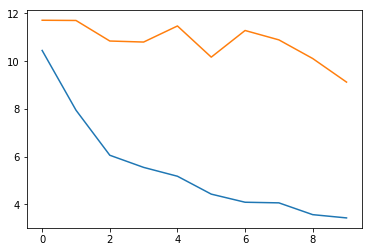

In [82]:
# plot metrics
plt.plot(history_lenet5.history['rmse'])
plt.plot(history_lenet5.history['val_rmse'])
plt.show()

In [83]:
# look at final RMSE value after 10 epochs
print(history_lenet5.history.get('val_rmse')[-1])
print(history_lenet5.history.get('rmse')[-1])

9.124450047439504
3.4327802338472035


## AlexNet

In [84]:
# Try AlexNet

# create model
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(4,4), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(256, (5, 5), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(384, (3, 3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2000, activation='relu'))
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_alexnet = model.fit(X_train_nm2, y_train_nm, epochs=10, shuffle=True, batch_size=5, validation_split=0.2, verbose=2)



Train on 1712 samples, validate on 428 samples
Epoch 1/10
 - 51s - loss: 15.4839 - rmse: 15.4839 - mean_absolute_error: 12.7527 - mean_absolute_percentage_error: 27.4907 - val_loss: 6.4600 - val_rmse: 6.4600 - val_mean_absolute_error: 5.3464 - val_mean_absolute_percentage_error: 11.5200
Epoch 2/10
 - 53s - loss: 5.3084 - rmse: 5.3084 - mean_absolute_error: 4.1539 - mean_absolute_percentage_error: 9.3531 - val_loss: 4.2676 - val_rmse: 4.2676 - val_mean_absolute_error: 3.2567 - val_mean_absolute_percentage_error: 7.8354
Epoch 3/10
 - 53s - loss: 3.5459 - rmse: 3.5459 - mean_absolute_error: 2.7273 - mean_absolute_percentage_error: 6.4949 - val_loss: 4.3517 - val_rmse: 4.3517 - val_mean_absolute_error: 3.3204 - val_mean_absolute_percentage_error: 7.8320
Epoch 4/10
 - 52s - loss: 3.5430 - rmse: 3.5430 - mean_absolute_error: 2.7288 - mean_absolute_percentage_error: 6.5420 - val_loss: 4.7635 - val_rmse: 4.7635 - val_mean_absolute_error: 3.7299 - val_mean_absolute_percentage_error: 8.8831
Epoc

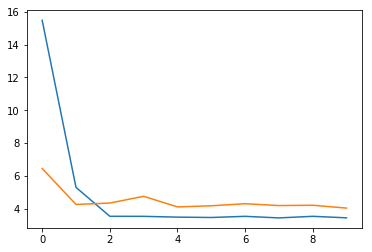

In [85]:
# plot metrics
plt.plot(history_alexnet.history['rmse'])
plt.plot(history_alexnet.history['val_rmse'])
plt.show()

In [86]:
# look at final RMSE value after 10 epochs
print(history_alexnet.history.get('val_rmse')[-1])
print(history_alexnet.history.get('rmse')[-1])

4.045419884062259
3.452849775692013


## VGG-16

In [26]:
# VGG-16
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(96,96,1), data_format='channels_last'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(30))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [34]:
# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model = VGG_16()
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_vgg16 = model.fit(X_train_nm2, y_train_nm, epochs=10, shuffle=True, batch_size=5, validation_split=0.2, verbose=2)


Train on 1712 samples, validate on 428 samples
Epoch 1/10
 - 511s - loss: 13.7870 - rmse: 13.7870 - mean_absolute_error: 11.9238 - mean_absolute_percentage_error: 25.9692 - val_loss: 5.4199 - val_rmse: 5.4199 - val_mean_absolute_error: 4.3604 - val_mean_absolute_percentage_error: 10.5889
Epoch 2/10
 - 481s - loss: 4.9006 - rmse: 4.9006 - mean_absolute_error: 3.8463 - mean_absolute_percentage_error: 8.8232 - val_loss: 4.5789 - val_rmse: 4.5789 - val_mean_absolute_error: 3.6045 - val_mean_absolute_percentage_error: 8.5717
Epoch 3/10
 - 477s - loss: 10.3100 - rmse: 10.3100 - mean_absolute_error: 8.8277 - mean_absolute_percentage_error: 19.3717 - val_loss: 5.3117 - val_rmse: 5.3117 - val_mean_absolute_error: 4.1144 - val_mean_absolute_percentage_error: 10.5455
Epoch 4/10
 - 482s - loss: 6.3365 - rmse: 6.3365 - mean_absolute_error: 5.0653 - mean_absolute_percentage_error: 11.4661 - val_loss: 4.5144 - val_rmse: 4.5144 - val_mean_absolute_error: 3.4947 - val_mean_absolute_percentage_error: 8.

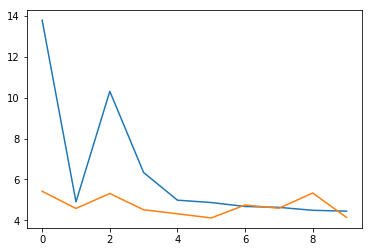

In [35]:
# plot metrics
plt.plot(history_vgg16.history['rmse'])
plt.plot(history_vgg16.history['val_rmse'])
plt.show()

In [36]:
# look at final RMSE value after 10 epochs
print(history_vgg16.history.get('val_rmse')[-1])
print(history_vgg16.history.get('rmse')[-1])

4.140290090413851
4.446081442671401


## Adjusted VGG-16
#### Use fewer channels since input size is smaller

In [16]:
# VGG-16
def VGG_16_small(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(96,96,1), data_format='channels_last'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(30))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [17]:
# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model = VGG_16_small()
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_vgg16s = model.fit(X_train_nm2, y_train_nm, epochs=10, shuffle=True, batch_size=5, validation_split=0.2, verbose=2)


Train on 1712 samples, validate on 428 samples
Epoch 1/10
 - 66s - loss: 10.8851 - rmse: 10.8851 - mean_absolute_error: 8.9314 - mean_absolute_percentage_error: 19.6352 - val_loss: 4.4713 - val_rmse: 4.4713 - val_mean_absolute_error: 3.4832 - val_mean_absolute_percentage_error: 8.5661
Epoch 2/10
 - 63s - loss: 6.6116 - rmse: 6.6116 - mean_absolute_error: 5.2171 - mean_absolute_percentage_error: 11.5956 - val_loss: 4.3571 - val_rmse: 4.3571 - val_mean_absolute_error: 3.3359 - val_mean_absolute_percentage_error: 7.9610
Epoch 3/10
 - 64s - loss: 6.4894 - rmse: 6.4894 - mean_absolute_error: 5.1244 - mean_absolute_percentage_error: 11.4467 - val_loss: 4.4603 - val_rmse: 4.4603 - val_mean_absolute_error: 3.4751 - val_mean_absolute_percentage_error: 8.1547
Epoch 4/10
 - 64s - loss: 6.0035 - rmse: 6.0035 - mean_absolute_error: 4.7102 - mean_absolute_percentage_error: 10.5127 - val_loss: 4.2428 - val_rmse: 4.2428 - val_mean_absolute_error: 3.2383 - val_mean_absolute_percentage_error: 7.6928
Epo

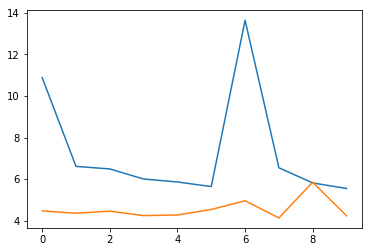

In [18]:
# plot metrics
plt.plot(history_vgg16s.history['rmse'])
plt.plot(history_vgg16s.history['val_rmse'])
plt.show()

In [19]:
# look at final RMSE value after 10 epochs
print(history_vgg16s.history.get('val_rmse')[-1])
print(history_vgg16s.history.get('rmse')[-1])

4.23293590879886
5.548649120414368
